# Lab 2: Two-Slit Single Photon at a Time

Th

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [134]:
################
## Load Files ##
################
#
#########
# Laser #
####################################################################
# Laser Double Slit 
file_double_L = 'L_both_slit_v2.csv'
data_double_L = np.loadtxt(file_double_L, skiprows=1, delimiter=',')
# Laser Left
file_Left_L = 'L_left_slit.csv'
data_Left_L = np.loadtxt(file_Left_L, skiprows=1, delimiter=',')
# Laser Right
file_Right_L = 'L_right_slit.csv'
data_Right_L = np.loadtxt(file_Right_L, skiprows=1, delimiter=',')
# Laser Background
file_BGL_L = 'L_left_no_slit.csv'
data_BGL_L = np.loadtxt(file_BGL_L, skiprows=1, delimiter=',')
file_BGR_L = 'L_right_no_slit.csv'
data_BGR_L = np.loadtxt(file_BGR_L, skiprows=1, delimiter=',')
###################################################################
#
########
# Bulb #
####################################################
# Blub Lefft
file_Left_B = 'Bulb_left_slit.csv'
data_Left_B = np.loadtxt(file_Left_B, skiprows=1, delimiter=',')


######################################
#
###########################
## assign the Laser data ##
###########################
#
################
# Laser Double #######################
# - Convert position to meters(*0.001)
position_D_L = data_double_L[:,0]*0.001
# Voltage Measurments Double Slit
voltage_D_1  = data_double_L[:,1] 
voltage_D_2  = data_double_L[:,2]
voltage_D_3  = data_double_L[:,3]
#################################
#
##############
# Laser Left #########################
# - Convert position to meters(*0.001)
position_L_L = data_Left_L[:,0]*0.001
# Voltage Measurments Double Slit
voltage_L_1  = data_Left_L[:,1] 
voltage_L_2  = data_Left_L[:,2]
voltage_L_3  = data_Left_L[:,3]
#################################
#
###############
# Laser Right ########################
# - Convert position to meters(*0.001)
position_R_L = data_Right_L[:,0]*0.001
# Voltage Measurments Double Slit
voltage_R_1  = data_Right_L[:,1] 
voltage_R_2  = data_Right_L[:,2]
voltage_R_3  = data_Right_L[:,3]
#################################
#
##########################
## assign the bulb data ##
##########################
#
#############
# Bulb Left ##########################
# - Convert position to meters(*0.001)
position_L_B = data_Left_B[:,0]*0.001
# measurments (Counts/10 sec) converted to 
#   (Counts/1 sec)
counts_L_1   = data_Left_B[:,1]/10
counts_L_2   = data_Left_B[:,2]/10
counts_L_3   = data_Left_B[:,3]/10

## Background

As can be seen in the data files for the background readings, we found a constant measurement of **0.008** which is utilized for the best fits. We did find a few outliers as we passed the $8mm$ mark on the micrometer yet this was disregarded as the pattern is located between the marks of $2mm$ & $8mm$.

In [70]:
print(data_BGL_L[:,1] )
print(data_BGR_L[:,1] )

[0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008
 0.008 0.008 0.008 0.008 0.008 0.008 0.011 0.016 0.02 ]
[0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008
 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008]


# Best Fit Function

For our model, we utilized the **Fraunhofer** model presented within the lab manual. This uses the assumption that the light will act as a plane wave from an infinitely far source. This assumption is for both before and after the light passes through the double-slit. The following is the **Fraunhofer** model equation: 

\begin{align*}
    I(0) = I_0(\cos{\beta})^2(\frac{\sin{\alpha}}{\alpha})^2 
\end{align*}

where:


- $\alpha = \frac{\pi a}{\lambda}\sin{\theta}$  
- $\beta = \frac{\pi d}{\lambda}\sin{\theta}$


and the following are the given constants:
- The slit-width: a = 0.085 mm
- Center-to-separation: d = 0.353 mm
- Laser wavelength:  $\lambda_{laser}$ = 0.670 $\pm$ 0.005 $\mu$ m
- Bulb wavelength:  $\lambda_{bulb}$ = 0.541 to 0.551 $\mu$ m


From this it can be assumed that the variable $\theta$ expresses the radiation pattern, yet we further this by finding the relation of:

\begin{align*}
    \theta = \arctan{\frac{x}{l}} + \phi
\end{align*}

where the position of the micrometer is $x$, the length of the chamber of travel is $l = 50 cm$, and $\phi$ is the phase shift parameter for the best fit.


In [74]:
##############################
# Fit Function For the Laser #
##############################
# 
def Best_Fit(x, I_o, d, a, l, Lamb, phi, BG):
    # Relations
    Alpha = ((np.pi*a)/Lamb)*np.sin(np.arctan2(x,l)+phi)
    Beta  = ((np.pi*d)/Lamb)*np.sin(np.arctan2(x,l)+phi)
    # Return fit function
    return I_o*(np.cos(Beta)**2 *(np.sin(Alpha)/Alpha)**2) + BG

# Laser 

## Double Slit

[ 1.47799671e+01  4.48809826e-03  8.96926839e-04  3.75699458e+00
  8.64402928e-07 -1.16886642e-03  7.15011612e-01]
[ 7.14200647e+05 -7.43824718e-03  4.56521492e-03  9.62529398e-01
  6.35803213e-05  1.95560884e+02 -1.78452199e-01]
[-2.50671309e+02  2.66794484e-01  3.14666361e-02  9.52131120e+00
  2.34816880e-05  2.92829604e+00  1.19209663e+00]


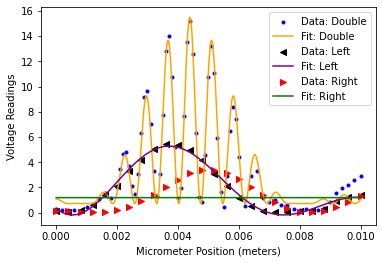

In [152]:
#############
# Constants #
a    = 0.085e-3
d    = 0.353e-3
l    = 0.5
Lamb = 0.670e-6
x = np.linspace(0,0.01,1000)
###############
#
##########
# Double #
##############
# Parameters #
phi = -0.0088
BG   = 0.008
I_o = 15
guess = np.array([I_o,d,a,l,Lamb,phi,BG])
##########################################
popt1, pcov1 = curve_fit(Best_Fit,
                        position_D_L ,
                        voltage_D_1,
                        p0=guess,
                        maxfev=100000)
print(popt1)
####
plt.scatter(position_D_L,
            voltage_D_1,
            color='blue',
            marker='.',
            label='Data: Double'
           )
plt.xlabel('Micrometer Position (meters)')
plt.ylabel('Voltage Readings')
plt.plot(x,Best_Fit(x,*popt1),
        color='orange',
        label='Fit: Double'
        )
##################################################################
#
########
# LEFT #
##############
# Parameters #
phi_L   = 1
BG_L    = 0.008
I_o_L   = 15
guess_L = np.array([I_o_L,d,a,l,Lamb,phi_L,BG_L])
##########################################
popt1_L, pcov1_L = curve_fit(Best_Fit,
                        position_L_L,
                        voltage_L_1,
                        p0=guess_L,
                        maxfev=100000)
print(popt1_L)
####
plt.scatter(position_L_L,
            voltage_L_1,
            color='black',
            marker='<',
            label='Data: Left'
           )
plt.xlabel('Micrometer Position (meters)')
plt.ylabel('Voltage Readings')



plt.plot(x,Best_Fit(x,*popt1_L),
        color='purple',
        label='Fit: Left'
        )
################################################################
#
#########
# RIGHT #
##############
# Parameters #
phi_R   = 1.1
BG_R    = 0.008
I_o_R   = 15
guess_R = np.array([I_o_R,d,a,l,Lamb,phi_R,BG_R])
##########################################
popt1_R, pcov1_R = curve_fit(Best_Fit,
                        position_R_L,
                        voltage_R_1,
                        p0=guess,
                        maxfev=100000)
print(popt1_R)
####
plt.scatter(position_R_L,
            voltage_R_1,
            color='red',
            marker='>',
            label='Data: Right'
           )
plt.xlabel('Micrometer Position (meters)')
plt.ylabel('Voltage Readings')



plt.plot(x,Best_Fit(x,*popt1_R),
        color='green',
        label='Fit: Right'
        )
##################################
plt.legend()
plt.show()

[ 1.48056688e+01  4.26322269e-03  8.49702433e-04  4.10709991e+00
  7.50324467e-07 -1.06891279e-03  7.23747628e-01]


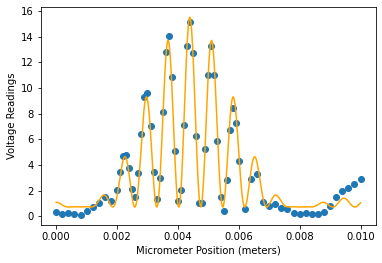

In [125]:
##############
# Parameters #
phi = -0.0088
BG   = 0.008
I_o = 15
guess = np.array([I_o,d,a,l,Lamb,phi,BG])
##########################################
popt2, pcov2 = curve_fit(Best_Fit,
                        position_D_L,
                        voltage_D_2,
                        p0=guess,
                        maxfev=100000)
print(popt2)
####
plt.scatter(position_D_L,voltage_D_2)
plt.xlabel('Micrometer Position (meters)')
plt.ylabel('Voltage Readings')

x = np.linspace(0,0.01,1000)

plt.plot(x,Best_Fit(x,*popt2),
        color='orange',
        label='fit'
        )
plt.show()

[ 1.47692489e+01  4.17082488e-03  8.32210157e-04  3.95350373e+00
  7.62612931e-07 -1.11058169e-03  7.25239361e-01]


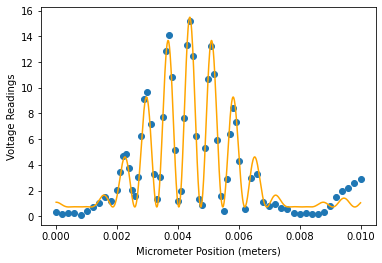

In [126]:
##############
# Parameters #
phi = -0.0088
BG   = 0.008
I_o = 15
guess = np.array([I_o,d,a,l,Lamb,phi,BG])
##########################################
popt3, pcov3 = curve_fit(Best_Fit,
                        position_D_L,
                        voltage_D_3,
                        p0=guess,
                        maxfev=100000)
print(popt3)
####
plt.scatter(position_D_L,voltage_D_3)
plt.xlabel('Micrometer Position (meters)')
plt.ylabel('Voltage Readings')

x = np.linspace(0,0.01,1000)

plt.plot(x,Best_Fit(x,*popt3),
        color='orange',
        label='fit'
        )
plt.show()

## Laser Single Slit Left

[ 7.14200647e+05 -7.43824718e-03  4.56521492e-03  9.62529398e-01
  6.35803213e-05  1.95560884e+02 -1.78452199e-01]


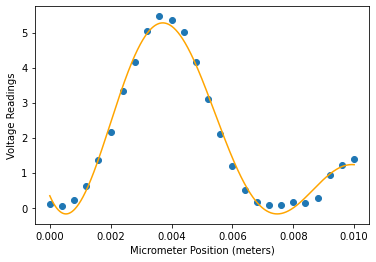

In [127]:
##############
# Parameters #
phi = 1
BG   = 0.008
I_o = 15
guess = np.array([I_o,d,a,l,Lamb,phi,BG])
##########################################
popt1_L, pcov1_L = curve_fit(Best_Fit,
                        position_L_L,
                        voltage_L_1,
                        p0=guess,
                        maxfev=100000)
print(popt1_L)
####
plt.scatter(position_L_L,voltage_L_1)
plt.xlabel('Micrometer Position (meters)')
plt.ylabel('Voltage Readings')

x = np.linspace(0,0.01,1000)

plt.plot(x,Best_Fit(x,*popt1_L),
        color='orange',
        label='fit'
        )
plt.show()

[ 3.42294671e+05 -7.17753632e-03  4.65119763e-03  1.12665334e+00
  6.38658865e-05  1.95305042e+02 -1.77459363e-01]


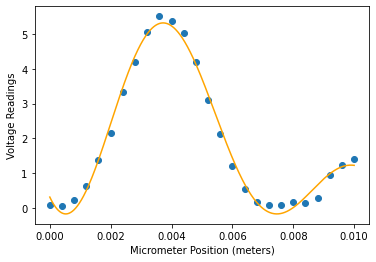

In [128]:
##############
# Parameters #
phi = 1
BG   = 0.008
I_o = 15
guess = np.array([I_o,d,a,l,Lamb,phi,BG])
##########################################
popt2_L, pcov2_L = curve_fit(Best_Fit,
                        position_L_L,
                        voltage_L_2,
                        p0=guess,
                        maxfev=100000)
print(popt2_L)
####
plt.scatter(position_L_L,voltage_L_2)
plt.xlabel('Micrometer Position (meters)')
plt.ylabel('Voltage Readings')

x = np.linspace(0,0.01,1000)

plt.plot(x,Best_Fit(x,*popt2_L),
        color='orange',
        label='fit'
        )
plt.show()

[ 1.93946706e+06  3.50074067e-04 -2.44392857e-04  2.44227887e+00
  8.07180433e-07  6.49861117e-01  2.21276835e-01]


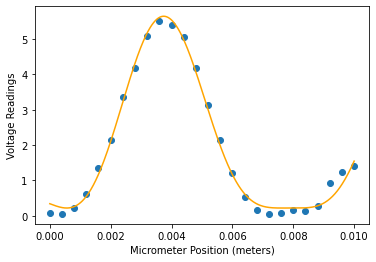

In [129]:
##############
# Parameters #
phi = .9
BG   = 0.008
I_o = 15
guess = np.array([I_o,d,a,l,Lamb,phi,BG])
##########################################
popt3_L, pcov3_L = curve_fit(Best_Fit,
                        position_L_L,
                        voltage_L_3,
                        p0=guess,
                        maxfev=100000)
print(popt3_L)
####
plt.scatter(position_L_L,voltage_L_3)
plt.xlabel('Micrometer Position (meters)')
plt.ylabel('Voltage Readings')

x = np.linspace(0,0.01,1000)

plt.plot(x,Best_Fit(x,*popt3_L),
        color='orange',
        label='fit'
        )
plt.show()

## Laser Single Slit Right

[1.09364633e+06 3.80821152e-02 1.12091783e-02 2.35818551e-01
 7.64371881e-05 1.09065021e+01 1.39066892e-02]


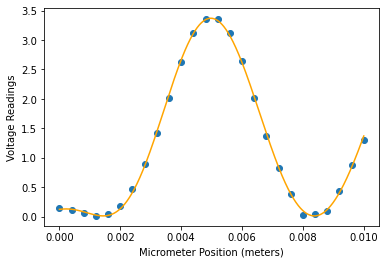

In [130]:
##############
# Parameters #
phi = 1
BG   = 0.008
I_o = 15
guess = np.array([I_o,d,a,l,Lamb,phi,BG])
##########################################
popt1_R, pcov1_R = curve_fit(Best_Fit,
                        position_R_L,
                        voltage_R_1,
                        p0=guess,
                        maxfev=100000)
print(popt1_R)
####
plt.scatter(position_R_L,voltage_R_1)
plt.xlabel('Micrometer Position (meters)')
plt.ylabel('Voltage Readings')

x = np.linspace(0,0.01,1000)

plt.plot(x,Best_Fit(x,*popt1_R),
        color='orange',
        label='fit'
        )
plt.show()

[1.08656715e+06 3.79332736e-02 1.12561372e-02 2.35578713e-01
 7.67533233e-05 1.09059216e+01 1.45319745e-02]


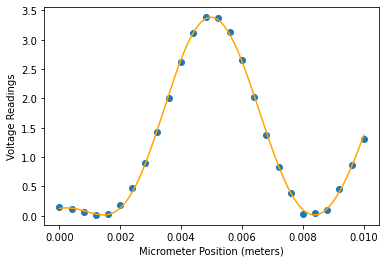

In [131]:
##############
# Parameters #
phi = 1
BG   = 0.008
I_o = 15
guess = np.array([I_o,d,a,l,Lamb,phi,BG])
##########################################
popt2_R, pcov2_R = curve_fit(Best_Fit,
                        position_R_L,
                        voltage_R_2,
                        p0=guess,
                        maxfev=100000)
print(popt2_R)
####
plt.scatter(position_R_L,voltage_R_2)
plt.xlabel('Micrometer Position (meters)')
plt.ylabel('Voltage Readings')

x = np.linspace(0,0.01,1000)

plt.plot(x,Best_Fit(x,*popt2_R),
        color='orange',
        label='fit'
        )
plt.show()

[ 4.75796874e+05  3.83480409e-02  1.13152592e-02  2.29581020e+00
  7.61510700e-05  1.16939588e+01 -6.20606535e-02]


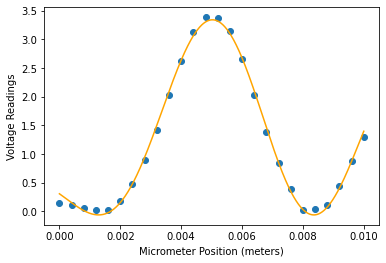

In [132]:
##############
# Parameters #
phi = 1
BG   = 0.008
I_o = 15
guess = np.array([I_o,d,a,l,Lamb,phi,BG])
##########################################
popt3_R, pcov3_R = curve_fit(Best_Fit,
                        position_R_L,
                        voltage_R_3,
                        p0=guess,
                        maxfev=100000)
print(popt3_R)
####
plt.scatter(position_R_L,voltage_R_3)
plt.xlabel('Micrometer Position (meters)')
plt.ylabel('Voltage Readings')

x = np.linspace(0,0.01,1000)

plt.plot(x,Best_Fit(x,*popt3_R),
        color='orange',
        label='fit'
        )
plt.show()

# Bulb

[ 7.39288634e+09  1.75305306e-02 -3.61126038e-02  2.88874876e+01
 -1.34734510e-05  3.43402954e+01 -6.19171232e+01]


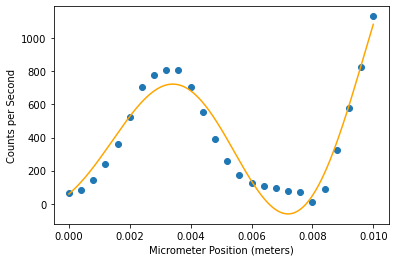

In [133]:
#############
# Constants #
a    = 0.085e-3
d    = 0.353e-3
l    = 0.5
Lamb = 0.551e-6
##############
# Parameters #
phi = 0.9
BG   = 0.8 
I_o = 15
guess = np.array([I_o,d,a,l,Lamb,phi,BG])
##########################################
popt1_BL, pcov1_BL = curve_fit(Best_Fit,
                        position_L_B ,
                        counts_L_1,
                        p0=guess,
                        maxfev=100000)
print(popt1_BL)
####
plt.scatter(position_L_B ,counts_L_1)
plt.xlabel('Micrometer Position (meters)')
plt.ylabel('Counts per Second')

x = np.linspace(0,0.01,1000)

plt.plot(x,Best_Fit(x,*popt1_BL),
        color='orange',
        label='fit'
        )
plt.show()